### KNN 기반 모델 생성
#### [1] 분류 => 품종 분류

In [21]:
# load module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[1-1] 데이터 준비 및 분석

In [22]:
samDF = pd.read_csv('sample_data.csv')

In [23]:
samDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length   49 non-null     float64
 1   Weight   49 non-null     float64
 2   Species  49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [24]:
samDF.head(3)

,Length,Weight,Species
0,25.4,242.0,B-Type
1,26.3,290.0,B-Type
2,26.5,340.0,B-Type


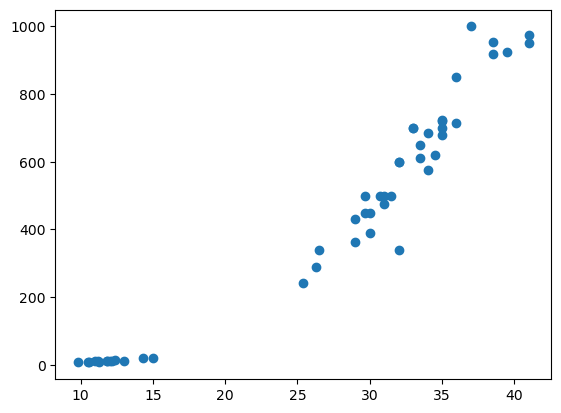

In [25]:
# data distribution
plt.scatter(samDF.Length, samDF.Weight)
plt.show()

[1-2] 데이터 전처리

In [26]:
# Target => Species, Data => length, weight
# Target => to numeric method (1)
samDF.Species.replace('B-Type', 0, inplace=True)
samDF.Species.replace('S-Type', 1, inplace=True)

In [27]:
# Target => to numeric method (2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(samDF.Species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [56]:
# select target & data
data = samDF[samDF.columns[:-1]].to_numpy()
target = samDF.Species

In [57]:
data.shape, target.shape

((49, 2), (49,))

[1-3] 학습용, 테스트용 데이터 생성

In [58]:
# Split to train & test data
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 2), (36,), (13, 2), (13,))

[1-4] 모델 객체 생성 및 학습

✔️ dataframe으로 학습시켰을 땐 new_data도 dataframe 형식으로 넣어줘야 함

In [60]:
KnnModel = KNeighborsClassifier()
KnnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
KnnModel.score(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

[1-5] 예측 및 평가

In [62]:
new_data = np.array([27.8, 358]).reshape(-1, 2)

y_pre = KnnModel.predict(new_data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
KnnModel.predict_proba(new_data)

array([[1., 0.]])

In [64]:
distance_, index_ = KnnModel.kneighbors(new_data)
distance_, index_

(array([[18.48350616, 68.01654211, 72.00999931, 92.01961747, 92.02630059]]),
 array([[13,  7, 18, 12, 27]], dtype=int64))

In [65]:
X_train[index_[0]]

array([[ 32. , 340. ],
       [ 26.3, 290. ],
       [ 29. , 430. ],
       [ 29.7, 450. ],
       [ 30. , 450. ]])

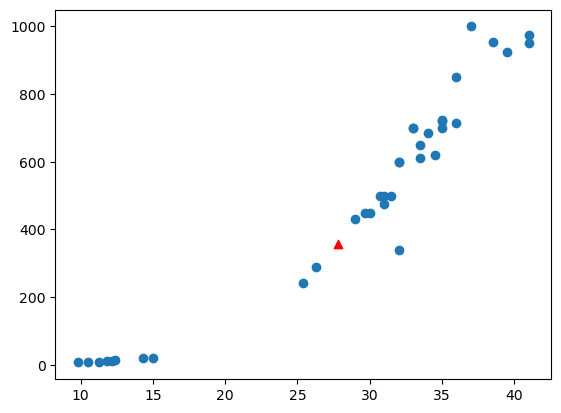

In [67]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(new_data[0][0], new_data[0][1], marker='^', c='red')
plt.show()

#### [2] 회귀 => 길이로 무게 예측

In [73]:
data = samDF.Length.to_numpy().reshape(-1, 1)
target = samDF.Weight

In [74]:
data.shape, target.shape

((49, 1), (49,))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [76]:
X_train[:5], y_train[:5]

(array([[39.5],
        [31. ],
        [34. ],
        [ 9.8],
        [36. ]]),
 32    925.0
 10    475.0
 21    685.0
 35      6.7
 27    714.0
 Name: Weight, dtype: float64)

[2-3] 회귀 모델 객체 생성

In [77]:
regModel = KNeighborsRegressor()

In [78]:
regModel.fit(X_train, y_train)

KNeighborsRegressor()

In [80]:
regModel.score(X_test, y_test)

0.9790911706685951

In [81]:
regModel.predict([[32.7]])

array([588.])

In [82]:
regModel.kneighbors([[32.7]])

# print distance, index

(array([[0.3, 0.3, 0.7, 0.7, 0.7]]),
 array([[16, 23, 33, 13, 17]], dtype=int64))